<a href="https://colab.research.google.com/github/AccessDenied1/HE_ML_Competition/blob/master/severity_airplane_accident/HE_aero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***I have used LGBM model for this.***
### Result 85% accuracy by online judge




In [1]:
from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/My\ Drive/HackerEarth/severity_airplane_accident

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/HackerEarth/severity_airplane_accident


In [0]:
import csv
from collections import defaultdict

columns = defaultdict(list) # each value in each column is appended to a list

with open('train.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k

sever = columns['Severity']
safety_score = columns['Safety_Score']
days = columns['Days_Since_Inspection']
complt = columns['Total_Safety_Complaints']
control = columns['Control_Metric']
turb = columns['Turbulence_In_gforces']
temp = columns['Cabin_Temperature']
code = columns['Accident_Type_Code']
elev = columns['Max_Elevation']
viol = columns['Violations']
weather = columns['Adverse_Weather_Metric']
id = columns['Accident_ID']

In [0]:
Safety_score = [float(i) for i in safety_score]
Days = [float(i) for i in days]
Complt = [float(i) for i in complt]
Control = [float(i) for i in control]
Turb = [float(i) for i in turb]
Temp = [float(i) for i in temp]
Code = [float(i) for i in code]
Elev = [float(i) for i in elev]
Viol = [float(i) for i in viol]
Weather = [float(i) for i in weather]
ID = [float(i) for i in id]

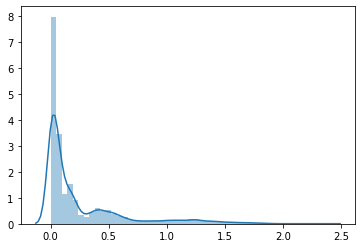

In [4]:
import seaborn as sns
ax = sns.distplot(Weather)

In [5]:
print("no of data = ",len(ID))

no of data =  10000


In [0]:
import numpy as np
X = np.zeros((10000,10))
X[:,0] = Safety_score
X[:,1] = Days
X[:,2] = Complt
X[:,3] = Control
X[:,4] = Turb
X[:,5] = Temp
X[:,6] = Code
X[:,7] = Elev
X[:,8] = Viol
X[:,9] = Weather

In [0]:
Y = np.array(sever)

In [8]:
from collections import Counter
Counter(Y).keys()

dict_keys(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities', 'Significant_Damage_And_Serious_Injuries', 'Highly_Fatal_And_Damaging'])

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
labels = list(le.classes_)

In [0]:
Y_new = le.transform(Y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_new, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [12]:
print("no of test data = ",len(y_test))
print("no of train data = ",len(y_train))

no of test data =  2000
no of train data =  8000


In [14]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 40
params['min_data'] = 50
params['max_depth'] = 15
params['task'] = 'train'
params['num_class'] = 4
params['max_bin'] = 500
params['num_iterations'] = 5000

clf = lgb.train(params, d_train, 100)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
y_pred=clf.predict(x_test)

In [0]:
import numpy as np
y_pred_lab = []
for i in y_pred:
    y_pred_lab.append(np.argmax(i))

In [17]:
err = 0
for i in range(len(y_test)):
    if (y_pred_lab[i] != y_test[i]):
        err = err + 1
print("Mean Validation error = ",float(err)/len(y_test))

Mean Validation error =  0.0445


In [0]:
y_t_pred=clf.predict(x_train)

In [0]:
import numpy as np
y_t_pred_lab = []
for i in y_t_pred:
    y_t_pred_lab.append(np.argmax(i))

In [20]:
err = 0
for i in range(len(y_train)):
    if (y_t_pred_lab[i] != y_train[i]):
        err = err + 1
print("Mean Training error = ",float(err)/len(y_train))

Mean Training error =  0.002625


In [0]:
import csv
from collections import defaultdict

columns = defaultdict(list) # each value in each column is appended to a list

with open('test.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k
                                 
safety_score = columns['Safety_Score']
days = columns['Days_Since_Inspection']
complt = columns['Total_Safety_Complaints']
control = columns['Control_Metric']
turb = columns['Turbulence_In_gforces']
temp = columns['Cabin_Temperature']
code = columns['Accident_Type_Code']
elev = columns['Max_Elevation']
viol = columns['Violations']
weather = columns['Adverse_Weather_Metric']
id = columns['Accident_ID']

In [0]:
Safety_score = [float(i) for i in safety_score]
Days = [float(i) for i in days]
Complt = [float(i) for i in complt]
Control = [float(i) for i in control]
Turb = [float(i) for i in turb]
Temp = [float(i) for i in temp]
Code = [float(i) for i in code]
Elev = [float(i) for i in elev]
Viol = [float(i) for i in viol]
Weather = [float(i) for i in weather]
ID = [float(i) for i in id]

In [24]:
print("no of data = ",len(ID))

no of data =  2500


In [0]:
import numpy as np
Xx = np.zeros((len(ID),10))
Xx[:,0] = Safety_score
Xx[:,1] = Days
Xx[:,2] = Complt
Xx[:,3] = Control
Xx[:,4] = Turb
Xx[:,5] = Temp
Xx[:,6] = Code
Xx[:,7] = Elev
Xx[:,8] = Viol
Xx[:,9] = Weather

In [0]:
Y_pred=clf.predict(Xx)

In [0]:
label_inx = []
for i in Y_pred:
    al = np.argmax(i)
    label_inx.append(labels[al])

In [0]:
import pandas as pd 

# list of name, degree, score 
# dictionary of lists 
dict = {'Accident_ID': ID, 'Severity': label_inx} 
	
df = pd.DataFrame(dict) 

# saving the dataframe 
df.to_csv('submission.csv',index=False)


In [0]:
from google.colab import files
files.download("submission.csv")